# Práctico 2 - Procesamiento Digital de Imágenes

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

### Funciones implementadas para ver las imagenes con los canales separados

def yChannel(img):# img debe estar en RGB
    imgRGB2YIQ = rgb2yiq(img)# Paso la imagen a espacio cromatico YIQ
    #Para mostrar el canal Y, elimino los canales IQ
    y = np.array([[1, 0, 0],
                  [0, 0, 0],
                  [0, 0, 0]])
    return apply_matrix(imgRGB2YIQ, y)# En la matriz res solo queda almacenado el canal Y

def iChannel(img):# img debe estar en RGB
    imgRGB2YIQ = rgb2yiq(img)# Paso la imagen a espacio cromatico YIQ
    #Para mostrar el canal I, elimino los canales YQ
    y = np.array([[0, 0, 0],
                  [0, 1, 0],
                  [0, 0, 0]])
    return apply_matrix(imgRGB2YIQ, y)# En la matriz res solo queda almacenado el canal Y

def qChannel(img):# img debe estar en RGB
    imgRGB2YIQ = rgb2yiq(img)# Paso la imagen a espacio cromatico YIQ
    #Para mostrar el canal Q, elimino los canales YI
    y = np.array([[0, 0, 0],
                  [0, 0, 0],
                  [0, 0, 1]])
    return apply_matrix(imgRGB2YIQ, y)# En la matriz res solo queda almacenado el canal Y
    

    

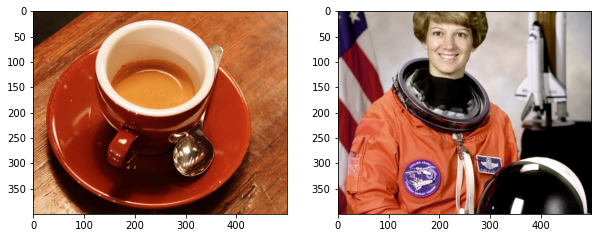

In [3]:
img_1 = imageio.imread('imageio:coffee.png')[:, 50:550, :]/255
img_2 = imageio.imread('imageio:astronaut.png')[56:456, 6:506, :]/255

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)

## 1. Aritmética de pixels

Implementar las siguientes operaciones aritméticas:

1. Suma y diferencia clampeada en RGB (la suma ya está hecha en el primer ejemplo)
2. Suma y diferencia promediada en RGB
3. Suma y diferencia en YIQ
4. If-lighter / If-darker

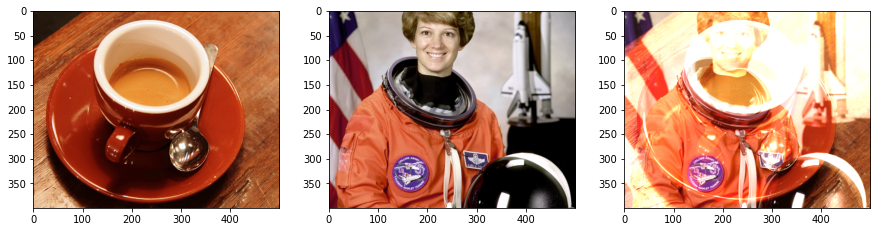

In [4]:
# Implementación de suma clampleada
img_3 = np.clip(img_1 + img_2, 0, 1)# Clamping

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)

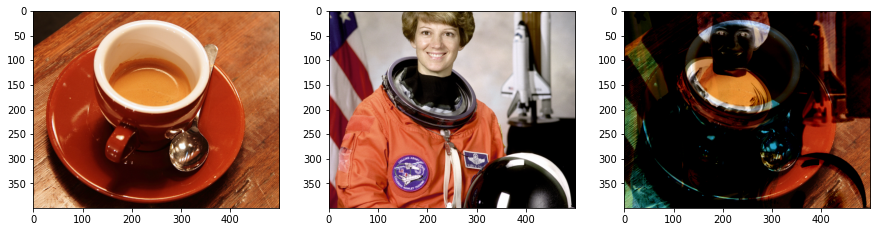

In [5]:
# Implementacion de la resta clampeada
img_3 = np.clip(img_1 - img_2, 0 ,1)
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)# Cafecito
axes[1].imshow(img_2)# Astronauta
axes[2].imshow(img_3)

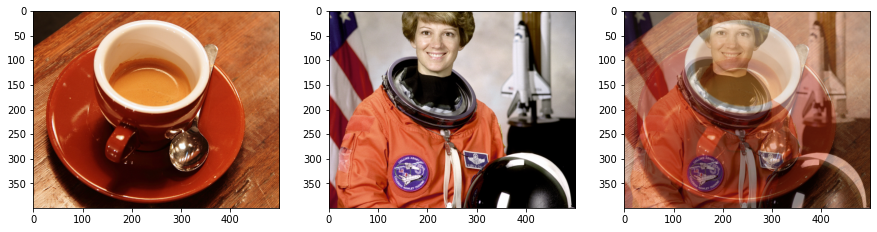

In [6]:
# Implementacion de la suma promediada en RGB
img_3 = (img_1 + img_2)/2
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)# Cafecito
axes[1].imshow(img_2)# Astronauta
axes[2].imshow(img_3)

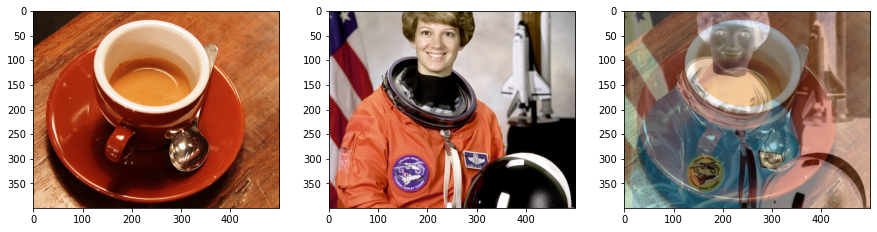

In [7]:
# Implementacion de la resta Promediada en RBG
img_3 = (img_1 - img_2)/2 + 0.5
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)# Cafecito
axes[1].imshow(img_2)# Astronauta
axes[2].imshow(img_3)

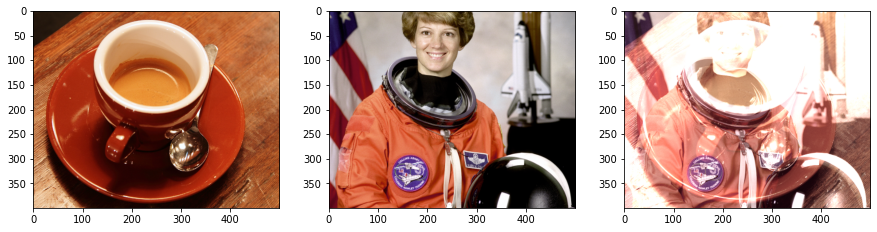

In [15]:
# Suma en YIQ Clampeada
## Sumar el canal Y de ambas imagenes
rgbMin = 0
rgbMax = 1
yMin =  0.01 # Esto es para que no divida por cero
yMax =  1
iMin = -.5957
iMax = 0.5957
qMin = -.5226
qMax = 0.5226

img1_Y = np.clip(yChannel(img_1),yMin,yMax) # Aplico clip para que no se salga de rango
img2_Y = np.clip(yChannel(img_2),yMin,yMax) # Aplico clip para que no se salga de rango

img1_I = np.clip(iChannel(img_1),iMin,iMax) # Aplico clip para que no se salga de rango
img2_I = np.clip(iChannel(img_2),iMin,iMax) # Aplico clip para que no se salga de rango

img1_Q = np.clip(qChannel(img_1),qMin,qMax) # Aplico clip para que no se salga de rango
img2_Q = np.clip(qChannel(img_2),qMin,qMax) # Aplico clip para que no se salga de rango

img3_Y = img1_Y + img2_Y

A = np.multiply(img1_Y,img1_I) + np.multiply(img2_Y, img2_I)
B = np.multiply(img1_Y,img1_Q) + np.multiply(img2_Y, img2_Q)
C = np.add(img1_Y, img2_Y)

img3_I = A / C
img3_Q = B / C

imgRes_YIQ = img3_Y + img3_I + img3_Q # Sumo las tres matrices/canales
imgRes_RGB = np.clip(yiq2rgb(imgRes_YIQ),rgbMin, rgbMax)# cambio de espacio cromatico

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)# Cafecito
axes[1].imshow(img_2)# Astronauta
axes[2].imshow(imgRes_RGB)

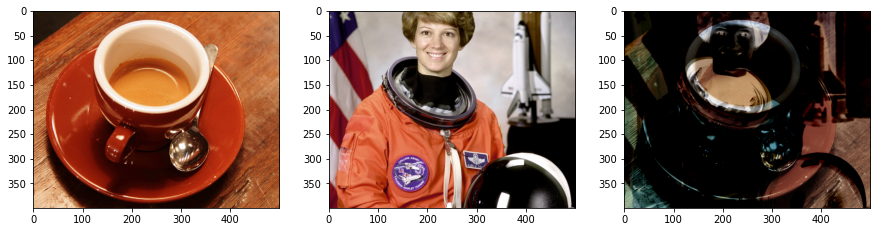

In [19]:
# Resta en YIQ Clampeada
## Restar el canal Y de ambas imagenes
rgbMin = 0
rgbMax = 1
yMin =  0.01 # Esto es para que no divida por cero
yMax =  1
iMin = -.5957
iMax = 0.5957
qMin = -.5226
qMax = 0.5226

img1_Y = np.clip(yChannel(img_1),yMin,yMax) # Aplico clip para que no se salga de rango
img2_Y = np.clip(yChannel(img_2),yMin,yMax) # Aplico clip para que no se salga de rango

img1_I = np.clip(iChannel(img_1),iMin,iMax) # Aplico clip para que no se salga de rango
img2_I = np.clip(iChannel(img_2),iMin,iMax) # Aplico clip para que no se salga de rango

img1_Q = np.clip(qChannel(img_1),qMin,qMax) # Aplico clip para que no se salga de rango
img2_Q = np.clip(qChannel(img_2),qMin,qMax) # Aplico clip para que no se salga de rango

img3_Y = img1_Y - img2_Y

A = np.multiply(img1_Y,img1_I) - np.multiply(img2_Y, img2_I)
B = np.multiply(img1_Y,img1_Q) - np.multiply(img2_Y, img2_Q)
C = np.add(img1_Y, img2_Y)

img3_I = A / C
img3_Q = B / C

imgRes_YIQ = img3_Y + img3_I + img3_Q # Sumo las tres matrices/canales
imgRes_RGB = np.clip(yiq2rgb(imgRes_YIQ),rgbMin, rgbMax)# cambio de espacio cromatico

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)# Cafecito
axes[1].imshow(img_2)# Astronauta
axes[2].imshow(imgRes_RGB)

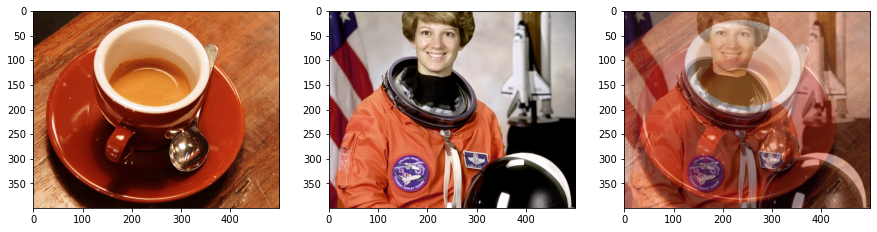

In [10]:
# Suma en YIQ Promediada
## Sumar y promediar el canal Y de ambas imagenes
rgbMin = 0
rgbMax = 1
yMin =  0.01 # Esto es para que no divida por cero
yMax =  1
iMin = -.5957
iMax = 0.5957
qMin = -.5226
qMax = 0.5226

img1_Y = np.clip(yChannel(img_1),yMin,yMax) # Aplico clip para que no se salga de rango
img2_Y = np.clip(yChannel(img_2),yMin,yMax) # Aplico clip para que no se salga de rango

img1_I = np.clip(iChannel(img_1),iMin,iMax) # Aplico clip para que no se salga de rango
img2_I = np.clip(iChannel(img_2),iMin,iMax) # Aplico clip para que no se salga de rango

img1_Q = np.clip(qChannel(img_1),qMin,qMax) # Aplico clip para que no se salga de rango
img2_Q = np.clip(qChannel(img_2),qMin,qMax) # Aplico clip para que no se salga de rango

img3_Y = (img1_Y + img2_Y)*0.5

A = np.multiply(img1_Y,img1_I) + np.multiply(img2_Y, img2_I)
B = np.multiply(img1_Y,img1_Q) + np.multiply(img2_Y, img2_Q)
C = np.add(img1_Y, img2_Y)

img3_I = A / C
img3_Q = B / C

imgRes_YIQ = img3_Y + img3_I + img3_Q # Sumo las tres matrices/canales
imgRes_RGB = np.clip(yiq2rgb(imgRes_YIQ),rgbMin, rgbMax)# cambio de espacio cromatico

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)# Cafecito
axes[1].imshow(img_2)# Astronauta
axes[2].imshow(imgRes_RGB)

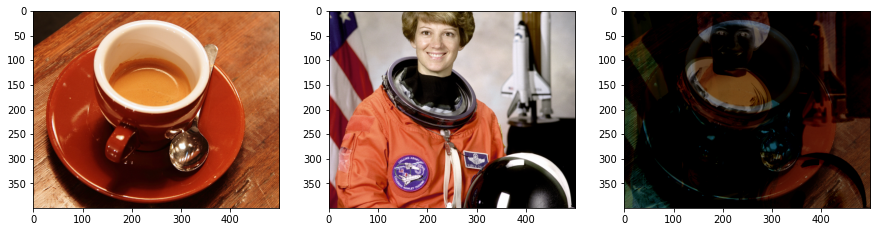

In [11]:
# Resta en YIQ Promediada
## Restar y promediar el canal Y de ambas imagenes
rgbMin = 0
rgbMax = 1
yMin =  0.01 # Esto es para que no divida por cero
yMax =  1
iMin = -.5957
iMax = 0.5957
qMin = -.5226
qMax = 0.5226

img1_Y = np.clip(yChannel(img_1),yMin,yMax) # Aplico clip para que no se salga de rango
img2_Y = np.clip(yChannel(img_2),yMin,yMax) # Aplico clip para que no se salga de rango

img1_I = np.clip(iChannel(img_1),iMin,iMax) # Aplico clip para que no se salga de rango
img2_I = np.clip(iChannel(img_2),iMin,iMax) # Aplico clip para que no se salga de rango

img1_Q = np.clip(qChannel(img_1),qMin,qMax) # Aplico clip para que no se salga de rango
img2_Q = np.clip(qChannel(img_2),qMin,qMax) # Aplico clip para que no se salga de rango

img3_Y = (img1_Y - img2_Y)*0.5

A = np.multiply(img1_Y,img1_I) - np.multiply(img2_Y, img2_I)
B = np.multiply(img1_Y,img1_Q) - np.multiply(img2_Y, img2_Q)
C = np.add(img1_Y, img2_Y)

img3_I = A / C
img3_Q = B / C

imgRes_YIQ = img3_Y + img3_I + img3_Q # Sumo las tres matrices/canales
imgRes_RGB = np.clip(yiq2rgb(imgRes_YIQ),rgbMin, rgbMax)# cambio de espacio cromatico

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)# Cafecito
axes[1].imshow(img_2)# Astronauta
axes[2].imshow(imgRes_RGB)

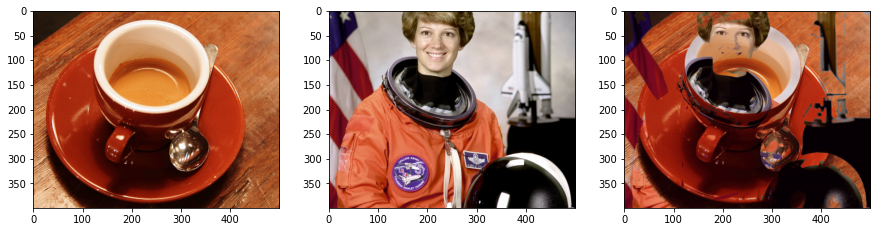

In [12]:
# If-Darker
rgbMin = 0
rgbMax = 1
yMin =  0.01 # Esto es para que no divida por cero
yMax =  1
iMin = -.5957
iMax = 0.5957
qMin = -.5226
qMax = 0.5226

img1_Y = np.clip(yChannel(img_1),yMin,yMax) # Aplico clip para que no se salga de rango
img2_Y = np.clip(yChannel(img_2),yMin,yMax) # Aplico clip para que no se salga de rango

img1_I = np.clip(iChannel(img_1),iMin,iMax) # Aplico clip para que no se salga de rango
img2_I = np.clip(iChannel(img_2),iMin,iMax) # Aplico clip para que no se salga de rango

img1_Q = np.clip(qChannel(img_1),qMin,qMax) # Aplico clip para que no se salga de rango
img2_Q = np.clip(qChannel(img_2),qMin,qMax) # Aplico clip para que no se salga de rango

img3_Y = img1_Y
img3_I = img1_I
img3_Q = img1_Q

# if-Darker
auxImg1 = img1_Y[:,:,0]
auxImg2 = img2_Y[:,:,0]
auxImg3 = auxImg1 - auxImg2

for numFil, elemfil in enumerate(auxImg3):
    for numCol, elemCol in enumerate(elemfil):
        if elemCol>0:
            img3_Y[numFil, numCol, 0] = img2_Y[numFil, numCol, 0]
            img3_I[numFil, numCol, 1] = img2_I[numFil, numCol, 1]
            img3_Q[numFil, numCol, 2] = img2_Q[numFil, numCol, 2]
        else:
            img3_Y[numFil, numCol, 0] = img1_Y[numFil, numCol, 0]
            img3_I[numFil, numCol, 1] = img1_I[numFil, numCol, 1]
            img3_Q[numFil, numCol, 2] = img1_Q[numFil, numCol, 2]

imgRes_YIQ = img3_Y + img3_I + img3_Q
imgRes_RGB = np.clip(yiq2rgb(imgRes_YIQ),rgbMin, rgbMax)# cambio de espacio cromatico

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)# Cafecito
axes[1].imshow(img_2)# Astronauta
axes[2].imshow(imgRes_RGB)

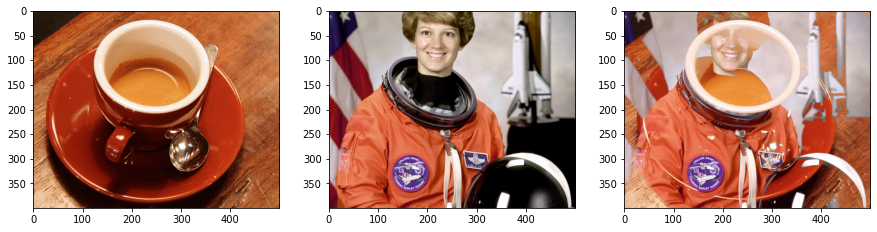

In [13]:
# If-Lighter
rgbMin = 0
rgbMax = 1
yMin =  0.01 # Esto es para que no divida por cero
yMax =  1
iMin = -.5957
iMax = 0.5957
qMin = -.5226
qMax = 0.5226

img1_Y = np.clip(yChannel(img_1),yMin,yMax) # Aplico clip para que no se salga de rango
img2_Y = np.clip(yChannel(img_2),yMin,yMax) # Aplico clip para que no se salga de rango

img1_I = np.clip(iChannel(img_1),iMin,iMax) # Aplico clip para que no se salga de rango
img2_I = np.clip(iChannel(img_2),iMin,iMax) # Aplico clip para que no se salga de rango

img1_Q = np.clip(qChannel(img_1),qMin,qMax) # Aplico clip para que no se salga de rango
img2_Q = np.clip(qChannel(img_2),qMin,qMax) # Aplico clip para que no se salga de rango

img3_Y = img1_Y
img3_I = img1_I
img3_Q = img1_Q

# if-Lighter
auxImg1 = img1_Y[:,:,0]
auxImg2 = img2_Y[:,:,0]
auxImg3 = auxImg1 - auxImg2

for numFil, elemfil in enumerate(auxImg3):
    for numCol, elemCol in enumerate(elemfil):
        if elemCol<0:
            img3_Y[numFil, numCol, 0] = img2_Y[numFil, numCol, 0]
            img3_I[numFil, numCol, 1] = img2_I[numFil, numCol, 1]
            img3_Q[numFil, numCol, 2] = img2_Q[numFil, numCol, 2]
        else:
            img3_Y[numFil, numCol, 0] = img1_Y[numFil, numCol, 0]
            img3_I[numFil, numCol, 1] = img1_I[numFil, numCol, 1]
            img3_Q[numFil, numCol, 2] = img1_Q[numFil, numCol, 2]

imgRes_YIQ = img3_Y + img3_I + img3_Q
imgRes_RGB = np.clip(yiq2rgb(imgRes_YIQ),rgbMin, rgbMax)# cambio de espacio cromatico

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)# Cafecito
axes[1].imshow(img_2)# Astronauta
axes[2].imshow(imgRes_RGB)